In [42]:
import pandas as pd
file_path = '训练集1.xlsx'
data = pd.read_excel(file_path)

In [44]:
# Calculating new columns based on the instructions
data['p1_sets_won'] = data['p1_sets'] - data['p2_sets']
data['p1_games_won'] = data['p1_games'] - data['p2_games']
data['p1_points'] = data['p1_points_won'] - data['p2_points_won']
# Transforming 'is_win' based on 'game_victor'
data['is_win'] = data['game_victor'].replace(2, 0)
# Creating 'Ace' column
data['ace'] = 0
data.loc[data['p1_ace'] > 0, 'ace'] = 1
data.loc[data['p2_ace'] > 0, 'ace'] = -1
# Creating 'Winning_shot' column
data['Winning_shot'] = 0
data.loc[data['p1_winner'] > 0, 'Winning_shot'] = 1
data.loc[data['p2_winner'] > 0, 'Winning_shot'] = -1
# Transforming 'winner_shot_type'
data['winning_shot_type'] = data['winner_shot_type'].replace({'F': 1, 'B': 2, '0': 0})
# Creating 'unf_err' column
data['unf_err'] = 0
data.loc[data['p1_unf_err'] > 0, 'unf_err'] = -1
data.loc[data['p2_unf_err'] > 0, 'unf_err'] = 1
# 处理p1_score p2_score
score_transformation = {'15': 1, '30': 2, '40': 3}
data['p1_score'] = data['p1_score'].replace(score_transformation).astype(int)
data['p2_score'] = data['p2_score'].replace(score_transformation).astype(int)
# Applying the requested encodings for 'serve_width', 'serve_depth', and 'return_depth'
encode_serve_width = {'B': 0, 'BC': 1, 'BW': 2, 'C': 3, 'W': 4}
encode_serve_depth = {'CTL': 0, 'NCTL': 1}
encode_return_depth = {'D': 0, 'ND': 1}

data['serve_width'] = data['serve_width'].map(encode_serve_width)
data['serve_depth'] = data['serve_depth'].map(encode_serve_depth)
data['return_depth'] = data['return_depth'].map(encode_return_depth)
columns_to_drop = [
    'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 
    'p1_score', 'p2_score', 
    'p1_points_won', 'p2_points_won', 'game_victor', 'p1_ace', 'p2_ace', 
    'p1_winner', 'p2_winner', 'winner_shot_type', 'p1_double_fault', 'p2_double_fault', 
    'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p2_net_pt_won', 'p1_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won',
    'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed'
]

# Ensuring only columns present in the dataframe are attempted to be dropped to avoid errors
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Dropping the columns
data_processed= data.drop(columns=columns_to_drop)

In [45]:
# Adjusting the conversion function to work with datetime.time objects
def convert_time_obj_to_seconds(time_obj):
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
data_processed['elapsed_time_s'] = data['elapsed_time'].apply(convert_time_obj_to_seconds)
data_processed['elapsed_hour'] = data['elapsed_time'].apply(lambda x: x.hour)
data_processed = data_processed.drop('elapsed_time', axis=1)

In [46]:
data_processed = data_processed.drop('elapsed_time_s', axis=1)
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   set_no             300 non-null    int64  
 1   game_no            300 non-null    int64  
 2   point_no           300 non-null    int64  
 3   server             300 non-null    int64  
 4   serve_no           300 non-null    int64  
 5   point_victor       300 non-null    int64  
 6   set_victor         300 non-null    int64  
 7   p1_distance_run    300 non-null    float64
 8   p2_distance_run    300 non-null    float64
 9   rally_count        300 non-null    int64  
 10  speed_mph          289 non-null    float64
 11  serve_width        299 non-null    float64
 12  serve_depth        299 non-null    float64
 13  return_depth       252 non-null    float64
 14  p1_sets_won        300 non-null    int64  
 15  p1_games_won       300 non-null    int64  
 16  p1_points          300 non

In [47]:
data_processed.head()

,set_no,game_no,point_no,server,serve_no,point_victor,set_victor,p1_distance_run,p2_distance_run,rally_count,...,return_depth,p1_sets_won,p1_games_won,p1_points,is_win,ace,Winning_shot,winning_shot_type,unf_err,elapsed_hour
0,1,1,1,1,2,2,0,6.000,7.840,2,...,1.0,0,0,-1,0,0,0,0,-1,0
1,1,1,2,1,1,1,0,5.253,7.094,1,...,1.0,0,0,0,0,0,0,0,0,0
2,1,1,3,1,1,2,0,13.800,19.808,4,...,0.0,0,0,-1,0,0,0,0,-1,0
3,1,1,4,1,1,1,0,51.108,75.631,13,...,0.0,0,0,0,0,0,1,1,0,0
4,1,1,5,1,1,1,0,0.649,0.813,1,...,NaN,0,0,1,0,1,1,0,0,0


In [57]:
output_file_path = 'processed_data.xlsx'
data_processed.to_excel(output_file_path, index=False)

In [59]:
data_processed = pd.read_excel('updated_processed_data.xlsx')
speed_mph_mode = data_processed['speed_mph'].mode()[0]

# Filling missing values in 'speed_mph' with its mode
data_processed['speed_mph'] = data_processed['speed_mph'].fillna(speed_mph_mode)
# Transforming 'is_win' based on 'game_victor'
data_processed['point_win'] = data_processed['point_victor'].replace(2, 0)
data_processed = data_processed.drop('point_victor', axis=1)
# Verifying if the fill operation was successful
data_processed['speed_mph'].isnull().sum()

0

In [60]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   set_no             300 non-null    int64  
 1   game_no            300 non-null    int64  
 2   point_no           300 non-null    int64  
 3   server             300 non-null    int64  
 4   serve_no           300 non-null    int64  
 5   set_victor         300 non-null    int64  
 6   p1_distance_run    300 non-null    float64
 7   p2_distance_run    300 non-null    float64
 8   rally_count        300 non-null    int64  
 9   speed_mph          300 non-null    int64  
 10  serve_width        299 non-null    float64
 11  serve_depth        299 non-null    float64
 12  return_depth       300 non-null    int64  
 13  p1_sets_won        300 non-null    int64  
 14  p1_games_won       300 non-null    int64  
 15  p1_points          300 non-null    int64  
 16  is_win             300 non

In [61]:
output_file_path = 'processed_data.xlsx'
data_processed.to_excel(output_file_path, index=False)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
data = pd.read_excel('processed_data.xlsx')
# 划分数据集
X = data.drop('point_win', axis=1)  # 特征矩阵
y = data['point_win']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# 预测与评估
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# 使用.predict_proba()获取每个类别的概率
probabilities = model.predict_proba(X_test)
scores = probabilities[:, 1]
print(scores)
print(y_test)

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       0.90      0.90      0.90        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

[0.82 0.15 0.25 0.87 0.1  0.06 0.69 0.22 0.47 0.31 0.26 0.67 0.18 0.12
 0.85 0.22 0.55 0.82 0.3  0.79 0.36 0.25 0.25 0.89 0.96 0.8  0.76 0.67
 0.81 0.67 0.14 0.4  0.55 0.27 0.19 0.84 0.24 0.87 0.56 0.06 0.63 0.07
 0.35 0.84 0.08 0.04 0.62 0.62 0.93 0.53 0.89 0.07 0.19 0.13 0.83 0.84
 0.48 0.59 0.41 0.03]
203    1
266    0
152    0
9      1
233    0
226    0
196    1
109    1
5      0
175    0
237    0
57     1
218    0
45     0
182    1
221    0
289    1
211    1
148    0
165    1
78     0
113    0
249    0
250    1
104    1
42     1
281    1
295    0
157    1
238    1
17     0
164    1
33     1
24     0
215    0
119    1
7      0
90     1
46     1
73

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   set_no             300 non-null    int64  
 1   game_no            300 non-null    int64  
 2   point_no           300 non-null    int64  
 3   server             300 non-null    int64  
 4   serve_no           300 non-null    int64  
 5   set_victor         300 non-null    int64  
 6   p1_distance_run    300 non-null    float64
 7   p2_distance_run    300 non-null    float64
 8   rally_count        300 non-null    int64  
 9   speed_mph          300 non-null    int64  
 10  serve_width        300 non-null    int64  
 11  serve_depth        300 non-null    int64  
 12  return_depth       300 non-null    int64  
 13  p1_sets_won        300 non-null    int64  
 14  p1_games_won       300 non-null    int64  
 15  p1_points          300 non-null    int64  
 16  is_win             300 non

In [ ]:
# 尝试删除具有指示本次point得分的数据特征
columns_to_drop = {'set_victor', 'p1_'}

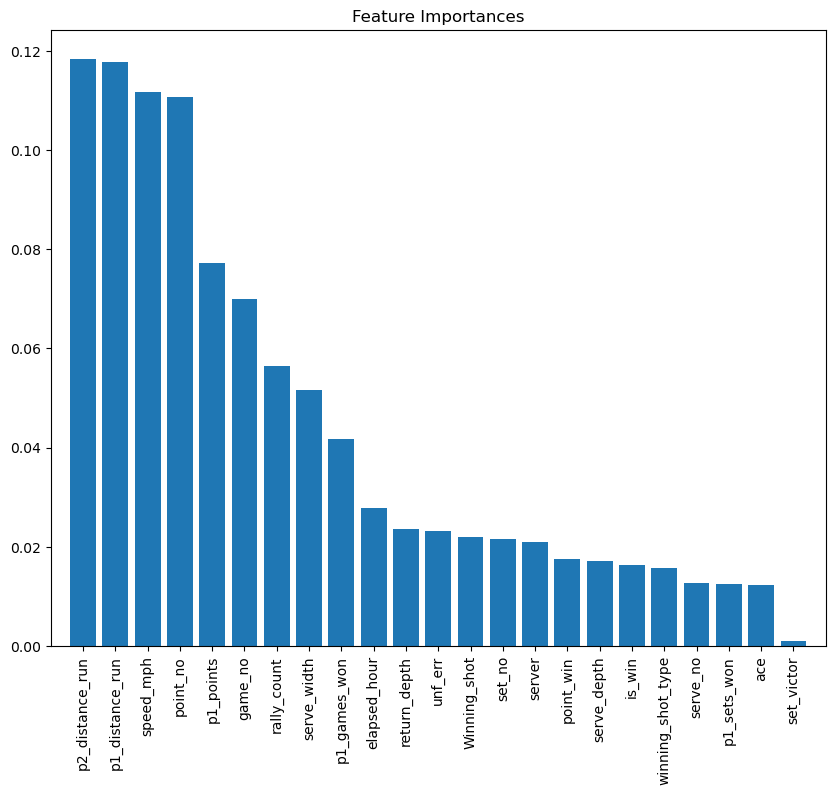

0.6166666666666667

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 加载数据
data_path = 'processed_data _for_k.xlsx'
data = pd.read_excel(data_path)
# 选择要归一化的特征
features_to_normalize = ['p1_distance_run', 'p2_distance_run', 'speed_mph']
scaler = MinMaxScaler()

# 对特定特征进行归一化
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])
# 准备数据
X = data.drop('next_point_win', axis=1)  # 特征
y = data['next_point_win']  # 标签

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测测试集
y_pred = rf_classifier.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)

# 获取特征重要性
feature_importances = rf_classifier.feature_importances_

# 可视化特征重要性
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

accuracy


In [5]:
data.head()

,set_no,game_no,point_no,server,serve_no,set_victor,p1_distance_run,p2_distance_run,rally_count,speed_mph,...,p1_games_won,p1_points,is_win,ace,Winning_shot,winning_shot_type,unf_err,elapsed_hour,point_win,next_point_win
0,1,1,1,1,2,0,0.085660,0.103661,2,0.152174,...,0,-1,0,0,0,0,-1,0,0,1
1,1,1,2,1,1,0,0.074996,0.093798,1,0.652174,...,0,0,0,0,0,0,0,0,1,0
2,1,1,3,1,1,0,0.197019,0.261903,4,0.695652,...,0,-1,0,0,0,0,-1,0,0,1
3,1,1,4,1,1,0,0.729656,1.000000,13,0.913043,...,0,0,0,0,1,1,0,0,1,1
4,1,1,5,1,1,0,0.009266,0.010750,1,0.521739,...,0,1,0,1,1,0,0,0,1,0
